Mean Squared Error: 47119.93


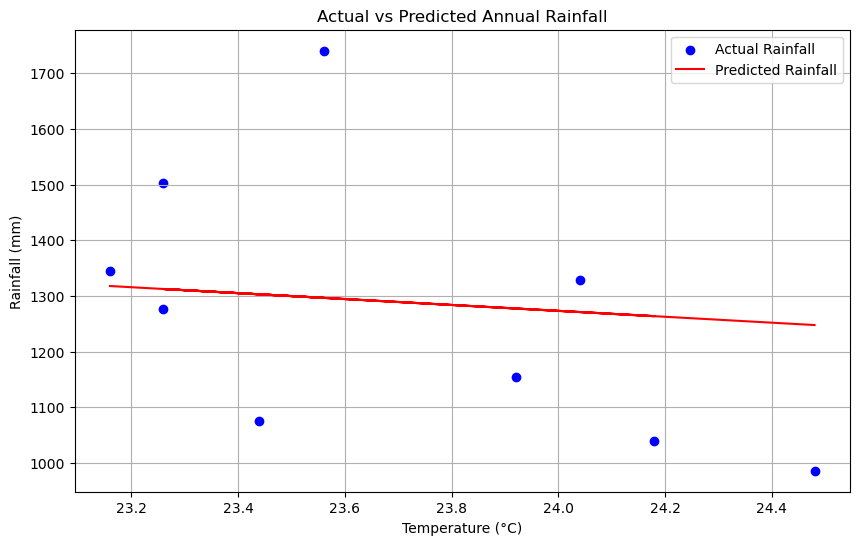

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Past Climate Data Studies
# Load and prepare the dataset, skipping unnecessary rows.
file_path = 'POWER_Point_Monthly_19810101_20221231_026d20N_092d94E_UTC.csv'
df = pd.read_csv(file_path, skiprows=11)

# Rename columns for simplicity and easier data handling
df.columns = ['Parameter', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']

# 2. Effects on Sectors (e.g., Agriculture, Water)
# Here, we're focusing on rainfall and temperature since these directly affect agricultural sectors.

# Isolate rainfall and temperature data for analysis
df_rainfall = df[df['Parameter'] == 'PRECTOTCORR_SUM'].copy()  # Rainfall data
df_temperature = df[df['Parameter'] == 'TS'].copy()  # Temperature data

# Convert 'Year' to integer to ensure data consistency
df_rainfall['Year'] = df_rainfall['Year'].astype(int)
df_temperature['Year'] = df_temperature['Year'].astype(int)

# Drop rows with missing values in the 'Annual' column for both datasets
df_rainfall.dropna(subset=['Annual'], inplace=True)
df_temperature.dropna(subset=['Annual'], inplace=True)

# Ensure that 'Annual' columns contain numeric values
df_rainfall['Annual'] = pd.to_numeric(df_rainfall['Annual'], errors='coerce')
df_temperature['Annual'] = pd.to_numeric(df_temperature['Annual'], errors='coerce')

# 3. Models to Predict Climate Effects
# First, we merge rainfall and temperature data based on the year to prepare for analysis.

# Identify common years between rainfall and temperature data
common_years = set(df_rainfall['Year']).intersection(df_temperature['Year'])

# Filter both datasets to only include these common years
df_rainfall = df_rainfall[df_rainfall['Year'].isin(common_years)]
df_temperature = df_temperature[df_temperature['Year'].isin(common_years)]

# Merge the two datasets on the 'Year' column
df_combined = pd.merge(df_temperature[['Year', 'Annual']], df_rainfall[['Year', 'Annual']], on='Year', suffixes=('_temp', '_rainfall'))

# Confirm merged data is not empty, indicating shared years in both datasets
if df_combined.empty:
    print("No common years between temperature and rainfall data. Please check the dataset.")
else:
    # Define the feature (temperature) and the target (rainfall) variables for prediction
    X = df_combined[['Annual_temp']]  # Average annual temperature as feature
    y = df_combined['Annual_rainfall']  # Annual rainfall as target

    # Split data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict rainfall for test data and evaluate model accuracy
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')

    # 4. Visualizing Actual vs. Predicted Rainfall
    # Show a scatter plot comparing actual and predicted rainfall values
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Rainfall')
    plt.plot(X_test, y_pred, color='red', label='Predicted Rainfall')
    plt.title('Actual vs Predicted Annual Rainfall')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()